# Inbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.

### First, download the data from: https://www.kaggle.com/ntnu-testimon/paysim1. Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?
### Note: don't use the entire dataset, use a sample instead, with n=100000 elements, so your computer doesn't freeze.

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Your code here
paysim = pd.read_csv("paysim.csv")

In [4]:
paysim = paysim.sample(n=100000)

In [5]:
paysim.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2684056,210,CASH_OUT,191034.41,C725961989,0.00,0.00,C635050420,1000753.92,1191788.34,0,0
5110397,355,CASH_OUT,110018.56,C1463080194,14971.00,0.00,C1731713649,0.00,1284506.29,0,0
2801509,225,CASH_IN,38627.00,C329943834,4084641.39,4123268.39,C1970400978,232711.13,194084.13,0,0
4037919,299,CASH_IN,113587.88,C394621186,20354.00,133941.88,C1546784860,949613.22,836025.34,0,0
3363139,254,PAYMENT,19356.47,C453404487,101961.00,82604.53,M987177925,0.00,0.00,0,0


In [7]:
paysim.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

### What is the distribution of the outcome? 

In [6]:
# Your response here
paysim["isFraud"].value_counts()

0    99872
1      128
Name: isFraud, dtype: int64

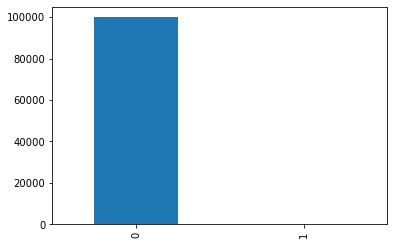

In [26]:
outcome_distribution = pd.value_counts(paysim['isFraud'])
outcome_distribution.plot(kind = 'bar')

### Clean the dataset. How are you going to integrate the time variable? Do you think the step (integer) coding in which it is given is appropriate?

In [9]:
# Your code here
paysim.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [11]:
paysim.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [18]:
paysim.drop(axis=1, columns=["nameOrig", "nameDest"], inplace=True)

In [22]:
paysim.drop(axis=1, columns=["type"], inplace=True)

### Run a logisitc regression classifier and evaluate its accuracy.

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
# Your code here:

X = paysim.drop(axis=1, columns="isFraud")
y = paysim["isFraud"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

model = LogisticRegression()

model = model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.99925
0.9992


C:\Users\ivana\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [32]:
pred = model.predict(X_test)
print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

precision:  0.75
recall:  0.7
f1:  0.7241379310344827


In [33]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[19963,     7],
       [    9,    21]], dtype=int64)

In [42]:
from sklearn.metrics import accuracy_score

In [43]:
accuracy_score(y_test,pred)

0.9992

### Now pick a model of your choice and evaluate its accuracy.

In [34]:
# Your code here
from sklearn.tree import DecisionTreeRegressor

In [35]:
tree = DecisionTreeRegressor(random_state=1)
tree.fit(X_train, y_train)
tree.score(X_test,y_test)

0.33233183107995323

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
model = KNeighborsClassifier(n_neighbors = 10)
model = model.fit(X_train, y_train)

In [39]:
print("test data accuracy was ",model.score(X_test,y_test))
print("train data accuracy was ", model.score(X_train, y_train))

test data accuracy was  0.99905
train data accuracy was  0.9992125


### Which model worked better and how do you know?

In [2]:
# Your response here

### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.